<a href="https://colab.research.google.com/github/thofes/SJ_distance/blob/main/2022-12-24_Vorselektion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect GDrive
from google.colab import drive
drive.mount('/content.gdrive')

#init Repository - YOLOv5
%cd /content


!git clone https://github.com/thofes/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

Mounted at /content.gdrive
/content
Cloning into 'yolov5'...
remote: Enumerating objects: 13875, done.
remote: Total 13875 (delta 0), reused 0 (delta 0), pack-reused 13875
Receiving objects: 100% (13875/13875), 25.91 MiB | 34.41 MiB/s, done.
Resolving deltas: 100% (9412/9412), done.
/content/yolov5
     |████████████████████████████████| 1.6 MB 27.6 MB/s 


In [58]:
landing_pic = "/content.gdrive/MyDrive/Vorselektion/29"
Path_Result = '/content.gdrive/MyDrive/Vorselektion/Yolo_skijumper_bigger/Results'

%cd /content/yolov5
#!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/TL_Skijumper_bigger/best_8.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result} --save-txt 
#!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/TL_Skijumper_bigger/best_8.pt" --name 'maxdetuno' --save-crop --source {landing_pic} --project {Path_Result} --save-txt --max-det 1
#!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/TL_Skijumper_bigger/best_8.pt" --name 'maxdetconfthres' --save-crop --source {landing_pic} --project {Path_Result} --save-txt --max-det 1 --conf-thres 0.5
!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/TL_Skijumper_bigger/best_8.pt" --name 'maxdetconfthres08coords' --save-crop --source {landing_pic} --project {Path_Result} --save-txt --max-det 1 --conf-thres 0.8




/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/TL_Skijumper_bigger/best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/29, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Yolo_skijumper_bigger/Results, name=maxdetconfthres, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-580-gec1168f Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/808 /content.gdrive/MyDrive/Vorselektion/29/Cam1_0000.jpg: 384x640 (no detections), 12.6ms
image 2/808 /content.gdrive/MyDrive/Vorselektion/29/Cam1_0001.jpg: 384x640 (no detections), 8.9ms
image 3/808 /conte

In [59]:
import json
import numpy as np

with open("/content.gdrive/MyDrive/Vorselektion/Yolo_skijumper_bigger/Results/maxdetconfthres2/list.json", "r") as fp:
    data = json.load(fp)

    
conf = np.array(data["conf"])
index = np.array(data["index"])
x_center = np.array(data["x"])
y_center = np.array(data["y"])

print(index)
print(conf)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

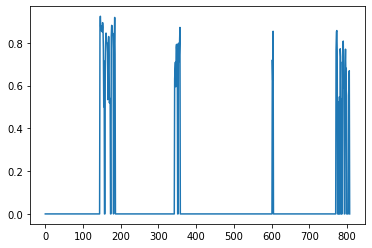

In [60]:
import matplotlib.pyplot as plt

X = index
Y = conf

plt.plot(X, Y)
plt.show()

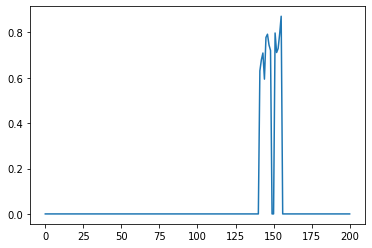

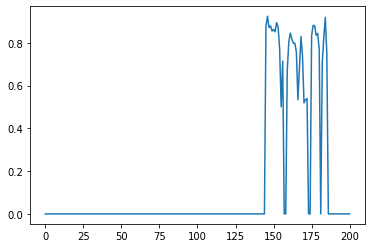

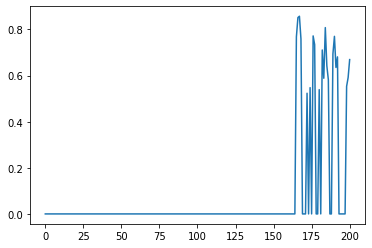

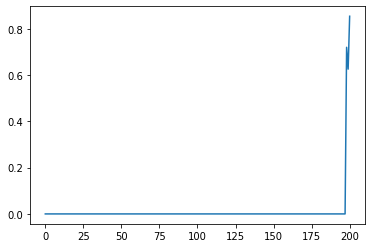

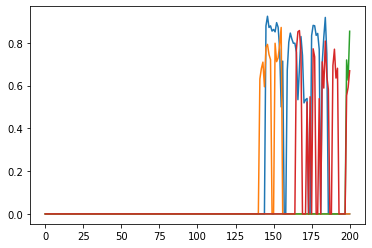

In [61]:
xaxis = np.arange(201)
y1 = conf[0:201]
y2 = conf[202:403]
y3 = conf[404:605]
y4 = conf[606:807]

plt.plot(xaxis, y2)
plt.show()
plt.plot(xaxis, y1)
plt.show()
plt.plot(xaxis, y4)
plt.show()
plt.plot(xaxis, y3)
plt.show()

plt.plot(xaxis, y1)
plt.plot(xaxis, y2)
plt.plot(xaxis, y3)
plt.plot(xaxis, y4)
plt.show()


In [62]:
final_indexes = []
for i, cf in enumerate(conf):
    if cf > 0:
      if i > 605:
        final_indexes.append(i-606)
      elif i > 403:
        final_indexes.append(i-404)
      elif i > 201:
        final_indexes.append(i-202)
      else:
        final_indexes.append(i)  


print("MIN: ", min(final_indexes))
print("MAX: ", max(final_indexes))
print("Lenght: ", len(final_indexes))

MIN:  141
MAX:  200
Lenght:  73


[1043.15623283 1024.31251287 1002.93751717  977.06252575  944.71875429
  908.71872425  881.15625858  854.71877575  827.71873713  798.46873283
  773.71872425  744.18747425  711.00003004  658.40624571  630.56246996
  601.59377575  575.43747425  550.40621996  523.68749142  491.06250644
  466.31249785  446.06248498  416.53123498  413.15625429  385.31251073
  359.71876502  312.74999142  302.34373927  262.12500751  259.59374785
  235.96875429  211.50000751  184.50000107  158.62499356  132.46874839
   98.71874839   61.31250188   54.84375      45.00000134   31.78124987]
[1103.99997711  985.77781677  994.66667175 1000.8889389  1005.33336639
 1009.77779388 1020.44448853 1019.55551147 1026.66664124 1039.1110611
 1048.88889313 1049.77775574 1064.88887787 1068.44444275 1069.33330536
 1075.55557251 1072.88887024 1075.55557251 1077.33329773 1075.55557251
 1077.33329773 1076.44443512 1077.33329773 1076.44443512 1079.11113739
 1072.88887024 1080.         1078.22227478 1079.11113739 1079.11113739
 1075.

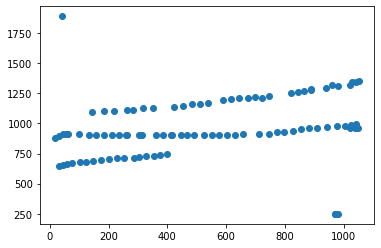

In [46]:
#print(x_center)
#print(y_center)
y_new = []
for y in y_center:
  y_new.append(1980-y)

plt.scatter(x_center,y_new)

